In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

In [2]:
users_train = pd.read_csv("training_users_list.csv")
users_test = pd.read_csv("testing_users_list.csv")

In [3]:
# feature engineering
users_train["year_last_online"] = pd.to_datetime(users_train.last_online).apply(lambda date: date.year)
# drop columns that have no value or are completely null
X_train = users_train.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                           'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 
                            'stats_rewatched','join_year', 'year_last_online', 'location'], axis=1)
# drop columns we expect to be overcorrelated
X_train = X_train.drop(['stats_episodes'], axis=1)
# create dummies
X_train = pd.get_dummies(X_train)

X_train = X_train.drop(['gender_Female', 'gender_Non-Binary'], axis=1)

In [4]:
# feature engineering
users_test["year_last_online"] = pd.to_datetime(users_test.last_online).apply(lambda date: date.year)
# drop columns that have no value or not useful for current audience segmentation
X_test = users_test.drop(['Unnamed: 0', 'username', 'birth_date', 'user_id', 'join_date', 'last_online', 'access_rank',
                         'user_watching', 'user_completed', 'user_onhold', 'user_dropped', 'user_plantowatch', 
                          'stats_rewatched','join_year', 'year_last_online', 'location'], axis=1)
# drop columns we expect to be overcorrelated
X_test = X_test.drop(['stats_episodes'], axis=1)
# create dummies
X_test = pd.get_dummies(X_test)

# drop columns that have no value or 
X_test = X_test.drop(['gender_Female', 'gender_Non-Binary'], axis=1)

In [5]:
X = pd.concat([X_train,X_test], axis=0)

In [6]:
X.describe()

,user_days_spent_watching,stats_mean_score,age,gender_Male
count,19005.000000,19005.000000,19005.000000,19005.000000
mean,53.673187,7.838457,29.627448,0.676401
std,54.417874,1.443112,4.909268,0.467861
min,0.500694,0.000000,14.231738,0.000000
25%,15.981944,7.430000,26.232067,0.000000
50%,37.698611,7.980000,29.284854,1.000000
75%,73.590972,8.550000,32.365020,1.000000
max,681.177975,10.000000,52.789946,1.000000


In [8]:
#X.to_csv('out.csv',index=False)

In [42]:
from sklearn.metrics import silhouette_score

loss = []
silhouette_scores = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    loss.append(-1* kmeans.score(X))
    
    if k != 1:
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else : 
        silhouette_scores.append(0)

Text(0, 0.5, 'LOSS')

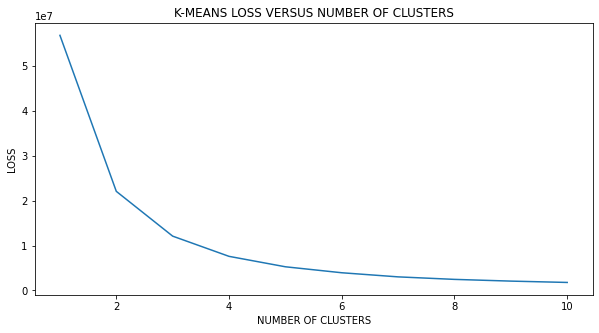

In [43]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), loss)
plt.title('K-MEANS LOSS VERSUS NUMBER OF CLUSTERS')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('LOSS')


Text(0, 0.5, 'SILHOUETTE SCORE')

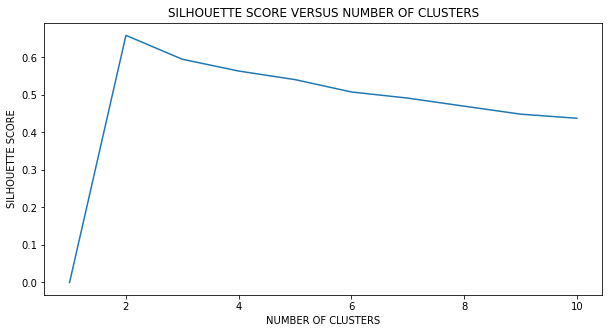

In [44]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), silhouette_scores)
plt.title('SILHOUETTE SCORE VERSUS NUMBER OF CLUSTERS')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('SILHOUETTE SCORE')


In [29]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.cluster_centers_

array([[ 23.48486645,   7.98841625,  29.33461764,   0.60805741],
       [206.28117633,   7.38453752,  31.15055906,   0.83682373],
       [ 88.56338525,   7.60286582,  29.95712585,   0.79328212]])

For n_clusters = 2 The average silhouette_score is : 0.6584872362554288
For n_clusters = 3 The average silhouette_score is : 0.5954328180398085
For n_clusters = 4 The average silhouette_score is : 0.5633611979392045
For n_clusters = 5 The average silhouette_score is : 0.540705007042659


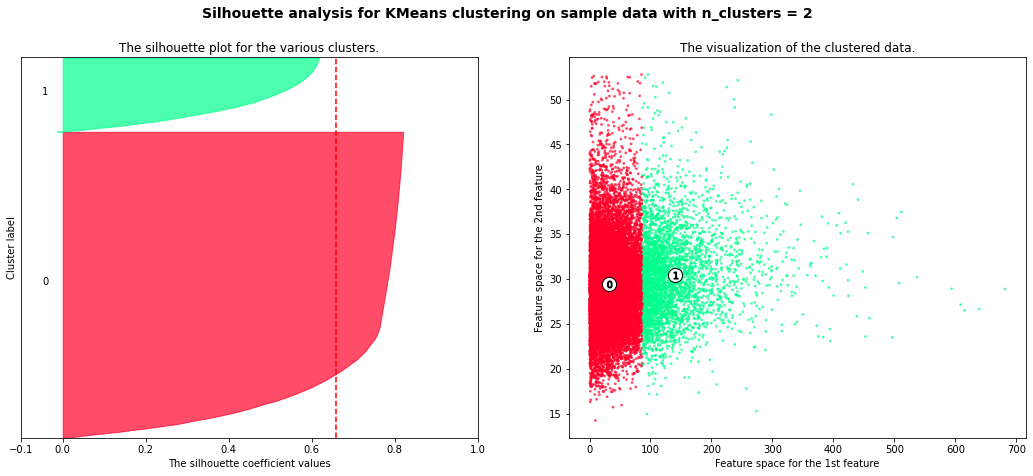

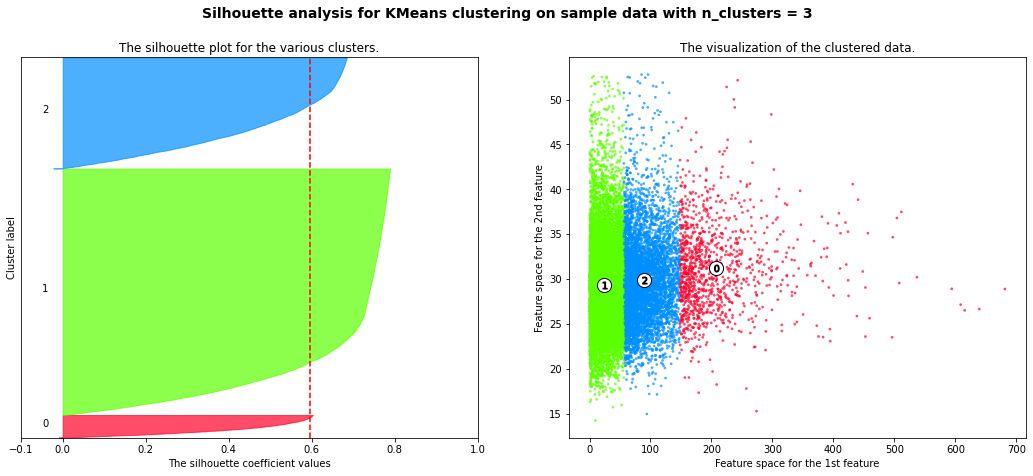

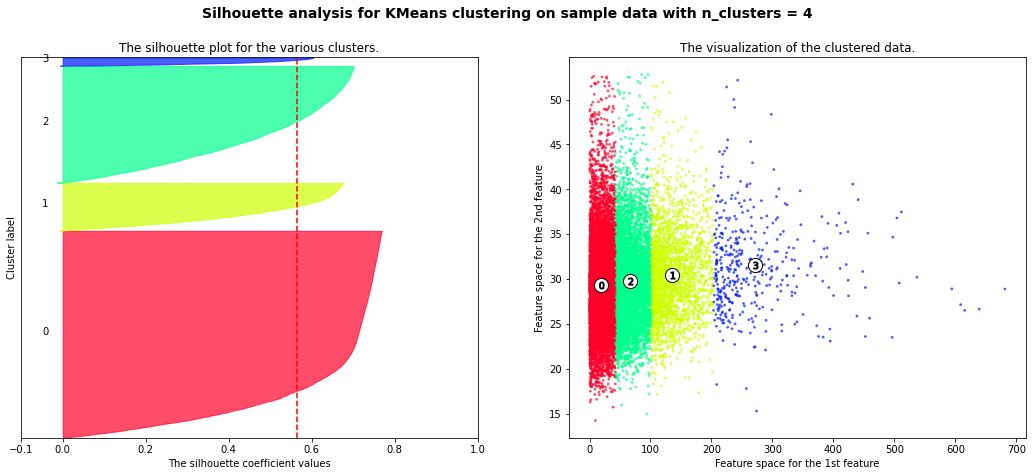

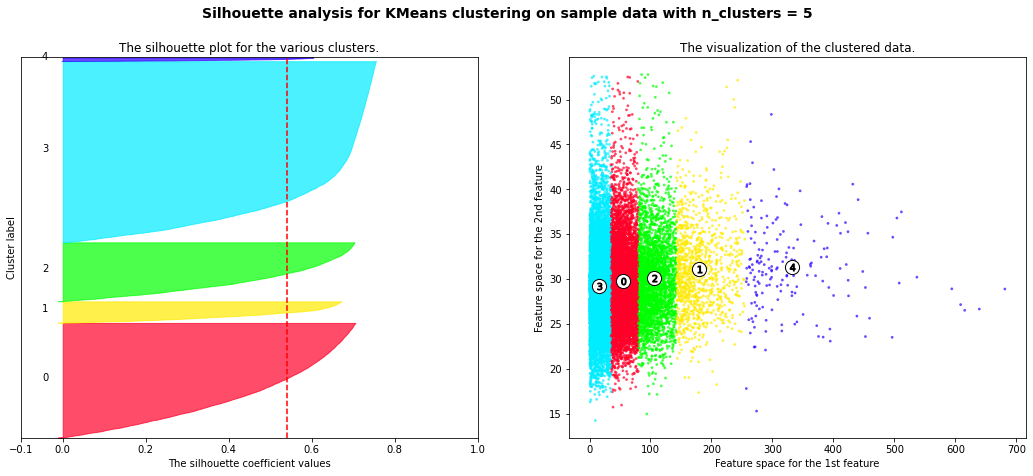

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.gist_rainbow(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.gist_rainbow(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

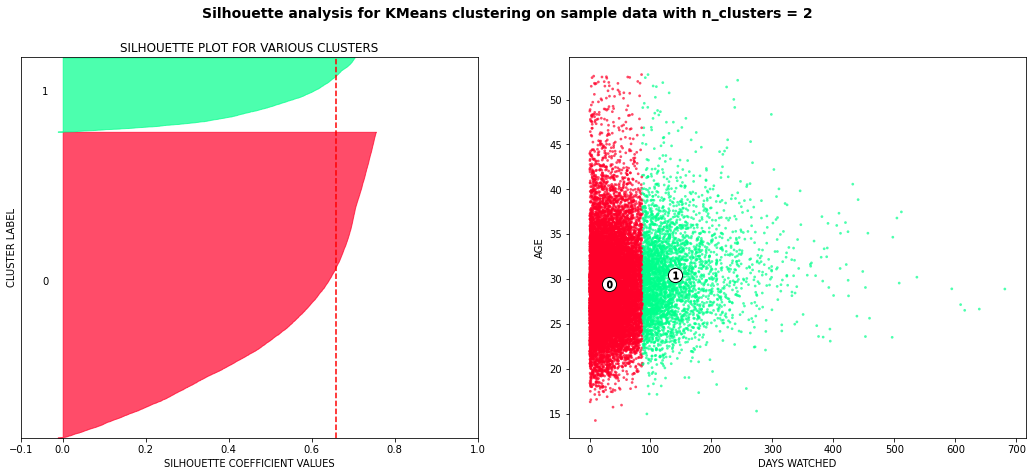

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.gist_rainbow(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("SILHOUETTE PLOT FOR VARIOUS CLUSTERS")
    ax1.set_xlabel("SILHOUETTE COEFFICIENT VALUES")
    ax1.set_ylabel("CLUSTER LABEL")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.gist_rainbow(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_xlabel("DAYS WATCHED")
    ax2.set_ylabel("AGE")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

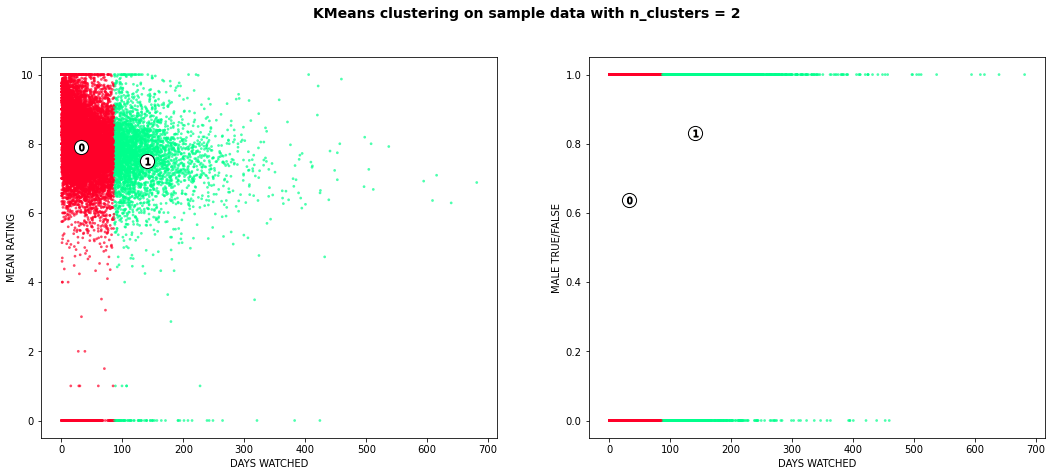

In [60]:
range_n_clusters = [2]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    
    #1st Plot showing the actual clusters formed
    colors = cm.gist_rainbow(cluster_labels.astype(float) / n_clusters)
    ax1.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax1.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax1.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax1.set_xlabel("DAYS WATCHED")
    ax1.set_ylabel("MEAN RATING")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.gist_rainbow(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 3], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 3],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[3], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_xlabel("DAYS WATCHED")
    ax2.set_ylabel("MALE TRUE/FALSE")

    plt.suptitle(
        "KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

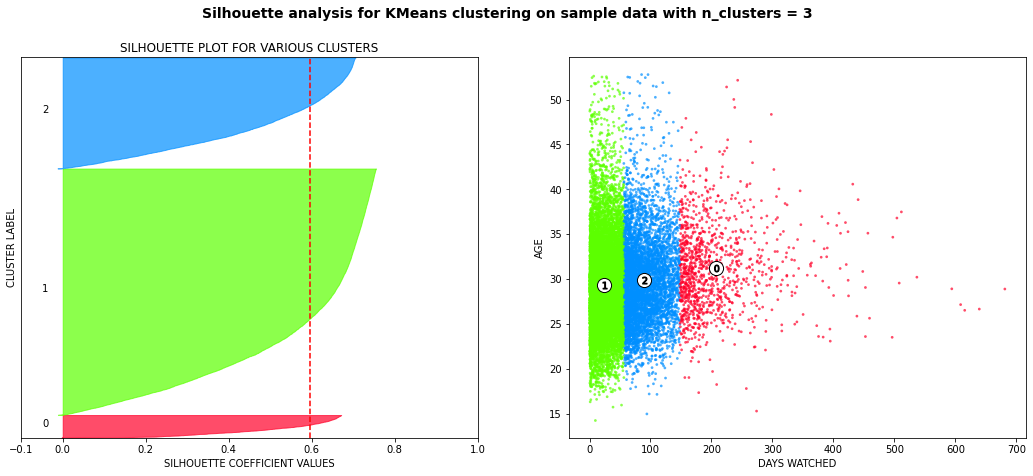

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.gist_rainbow(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("SILHOUETTE PLOT FOR VARIOUS CLUSTERS")
    ax1.set_xlabel("SILHOUETTE COEFFICIENT VALUES")
    ax1.set_ylabel("CLUSTER LABEL")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.gist_rainbow(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 2],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_xlabel("DAYS WATCHED")
    ax2.set_ylabel("AGE")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

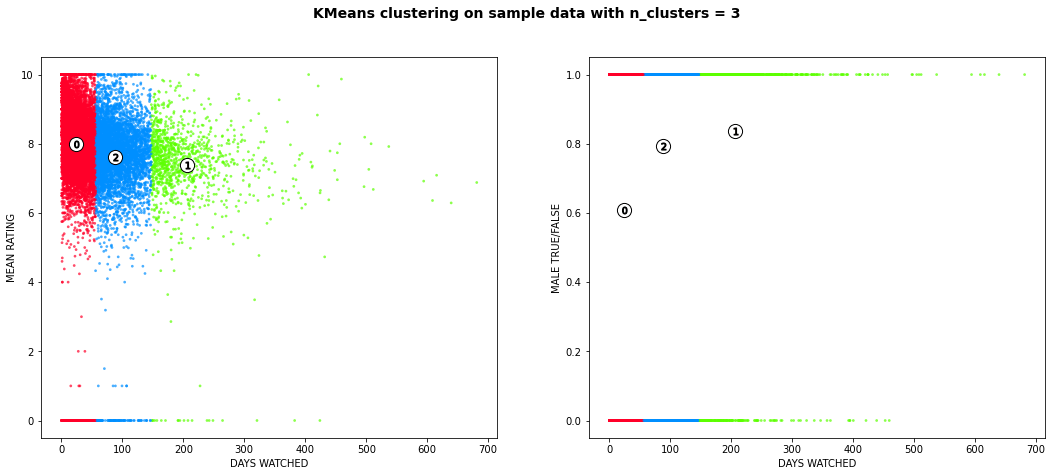

In [56]:
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)
    
    #1st Plot showing the actual clusters formed
    colors = cm.gist_rainbow(cluster_labels.astype(float) / n_clusters)
    ax1.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax1.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax1.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax1.set_xlabel("DAYS WATCHED")
    ax1.set_ylabel("MEAN RATING")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.gist_rainbow(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 3], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 3],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[3], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_xlabel("DAYS WATCHED")
    ax2.set_ylabel("MALE TRUE/FALSE")

    plt.suptitle(
        "KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 165
Silhouette Coefficient: 0.741


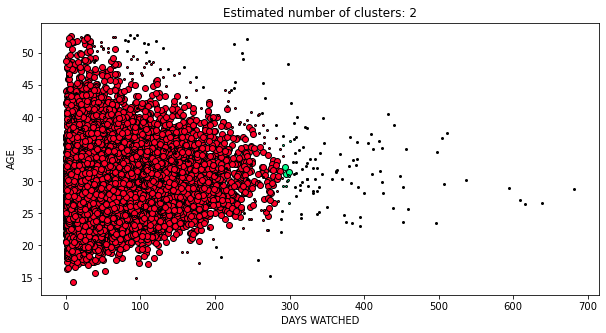

In [57]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=5.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Black removed and is used for noise instead.
plt.figure(figsize=(10,5))
unique_labels = set(labels)
colors = [plt.cm.gist_rainbow(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 2],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 2],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('DAYS WATCHED')
plt.ylabel('AGE')
plt.show()


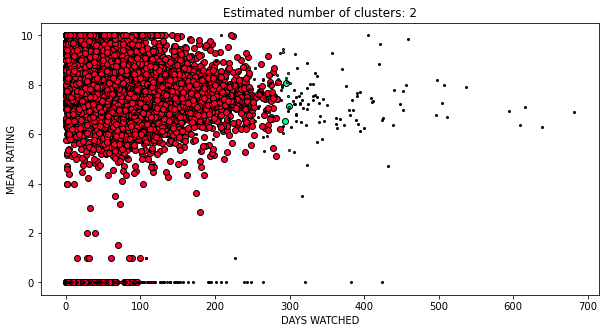

In [58]:
plt.figure(figsize=(10,5))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('DAYS WATCHED')
plt.ylabel('MEAN RATING')
plt.show()

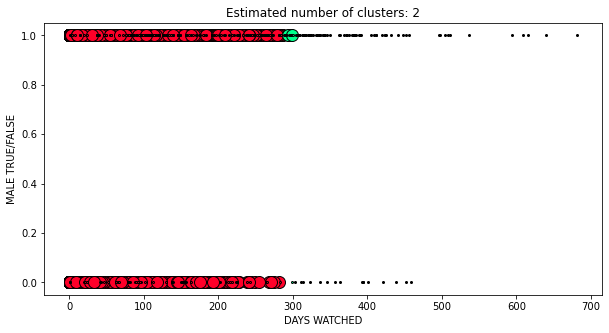

In [59]:
plt.figure(figsize=(10,5))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 3],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=12,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 3],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('DAYS WATCHED')
plt.ylabel('MALE TRUE/FALSE')
plt.show()